<a href="https://colab.research.google.com/github/krzgvfs/AdPixel2D/blob/main/Atividade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importando as bibliotecas**


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plot

import math
import matplotlib as mpl

**2. Realizando o download das imagens para o Notebook**

In [ ]:
!wget https://www.dropbox.com/sh/ebjehq74jdj0522/AAC045Pq_5OB0RPuj9rmyFIla
!unzip AAC045Pq_5OB0RPuj9rmyFIla

**3. Criando a variável PATH com o caminho da nossa pasta de imagens**

In [ ]:
PATH = "/content"

**3. Funções auxiliares para mostrar alguns gráficos didáticos**


In [ ]:
def plotMapeamento(mapeamento):
  ax = plot.figure().add_axes([0, 0, 1, 1])
  ax.set_xlim(-3, 258)
  ax.set_ylim(-3, 258)
  ax.grid(True)
  ax.set_xlabel("nível de cinza da imagem de entrada")
  ax.set_ylabel("nível de cinza da imagem de saída")
  plot.title("Re-mapeamento das intensidades de níveis de cinza")
  plot.plot(mapeamento, label="nível de cinza da imagem de saída", color='green')
  plot.plot(np.arange(0, 255), label="nível de cinza da imagem de entrada", color='orange')
  ax.legend()

def plotarImagens(imgEntrada, EH):
  quantLinhas = np.size(imgEntrada, 0)
  quantColunas = np.size(imgEntrada, 1)
  imgSaida = np.zeros( (quantLinhas, quantColunas), dtype='uint8' )
  
  for linha in range(quantLinhas):
    for coluna in range(quantColunas):
      valor = imgEntrada[linha, coluna]
      imgSaida[linha, coluna] = EH[valor]
  
  fig, (ax1, ax2, ax3) = plot.subplots(1, 3, figsize=(20,5))
  fig.subplots_adjust(hspace=0.5)
  
  
  ax1.imshow(cv.cvtColor(imgEntrada, cv.COLOR_GRAY2RGB), extent=(0, 100, 0, 80))
  ax2.imshow(cv.cvtColor(imgSaida, cv.COLOR_GRAY2RGB), extent=(0, 100, 0, 80))
  
  ax3.set_xlim(-3, 258)
  ax3.set_ylim(-3, 258)
  ax3.grid(True)
  ax3.set_xlabel("nível de cinza da imagem de entrada")
  ax3.set_ylabel("nível de cinza da imagem de saída")
  ax3.plot(EH, color='green')
  ax3.plot(np.arange(0, 255), color='orange')

  plotPaleta( EH )


def plotPaleta(funcao, quantidade=25):
  plot.rcParams["axes.edgecolor"] = "black"
  plot.rcParams["axes.linewidth"] = 1

  passo = int(255 / quantidade)
  c = np.arange(0, 255, passo) / 255
  paleta = list(zip(c, c, c)) + [(1, 1, 1)]
  n = len(paleta)
  
  fig, (ax1, ax2)  = plot.subplots(2, 1, figsize=(n, 3))
  fig.subplots_adjust(hspace=0.5)

  ax1.imshow(np.arange(n).reshape(1, n), cmap=mpl.colors.ListedColormap(paleta))
  ax1.set_xlabel("paleta de cores de uma imagem em tons de cinza")
  for index in range(len(c)):
    ax1.text(int(index), 0, str(int(c[index] * 255)), color='orange', ha='center', va='center' )
  ax1.text(len(c), 0, str(int(255)), color='orange', ha='center', va='center' )
  ax1.set_yticklabels([])
  ax1.set_xticklabels([])
  #ax1.set_xticks(np.arange(n))
  #ax1.set_xticklabels(list(np.arange(0, 255, passo)) + [255], color='orange')
  

  c = funcao[np.arange(0, 255, passo)] 
  maxvalue = funcao[len(funcao)-1] / 255
  c = np.array(c) / 255
  paleta = list(zip(c, c, c)) + [(maxvalue, maxvalue, maxvalue)]
  
  ax2.imshow(np.arange(n).reshape(1, n), cmap=mpl.colors.ListedColormap(paleta))
  for index in range(len(c)):
    ax2.text(int(index), 0, str(int(c[index] * 255)), color='green', ha='center', va='center' )
  ax2.text(len(c), 0, str(int(maxvalue*255)), color='green', ha='center', va='center' )
  ax2.set_xticklabels([])
  ax2.set_yticklabels([])
  #ax2.set_xticks(np.arange(n))
  #ax2.set_xticklabels(list(np.arange(0, 255, passo)) + [255], color='orange')
  
  
  ax2.set_xlabel("paleta de cores após o re-mapeamento das intensidades. \n\nNote que as intensidades em laranjas (imagem de entrada) foram re-mapeadas para as intensidades em verde (imagem de saída)")
  


**4. Funções**

**4.1 Função Linear**

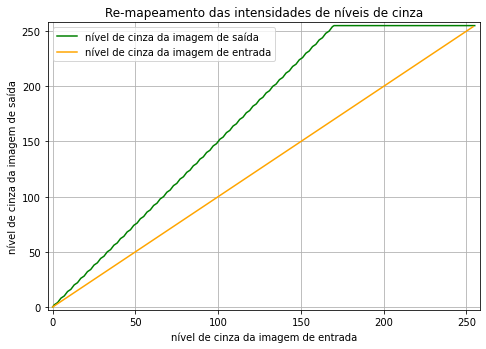

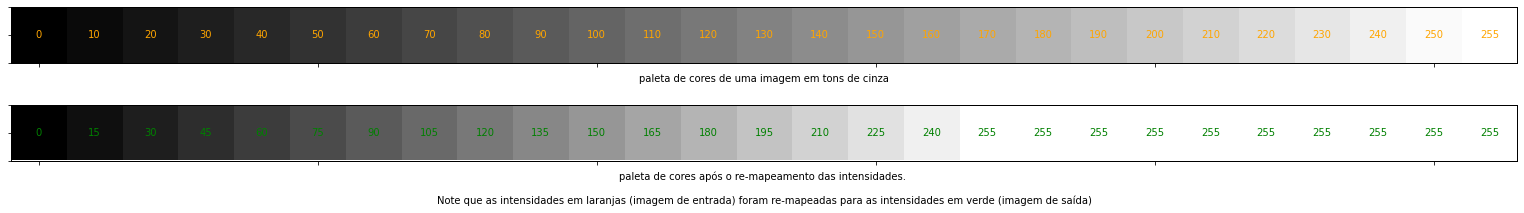

In [ ]:
def funcaoLinear(k):
  EH = np.zeros(256)

  for i in range(0, 256):

    valor = k * i #funcao linear

    #verificar se o resultado está dentro do intervalo de [0 a 255]
    if(valor < 0): 
      EH[i] = 0
    elif(valor > 255):
      EH[i] = 255
    else:
      EH[i] = round(valor)


  return EH

def filtroLinear(imgEntrada, k):
  quantLinhas = np.size(imgEntrada, 0)
  quantColunas = np.size(imgEntrada, 1)
  
  imgSaida = np.zeros( (quantLinhas, quantColunas), dtype='uint8' )
  
  EH = funcaoLinear(k)

  for linha in range(quantLinhas):
    for coluna in range(quantColunas):
      valor = imgEntrada[linha, coluna]
      imgSaida[linha, coluna] = EH[valor]

  return imgSaida


#############Testando a função#############
k = 1.5
plotMapeamento( funcaoLinear(k) )
plotPaleta( funcaoLinear(k) )

**4.2 Função logarítmica**

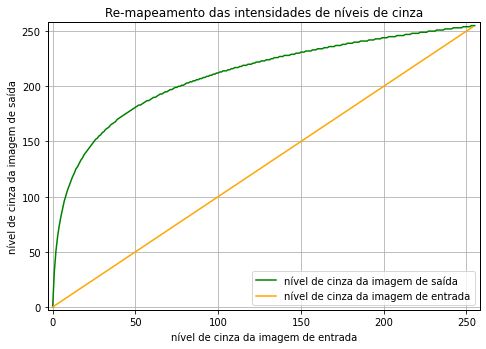

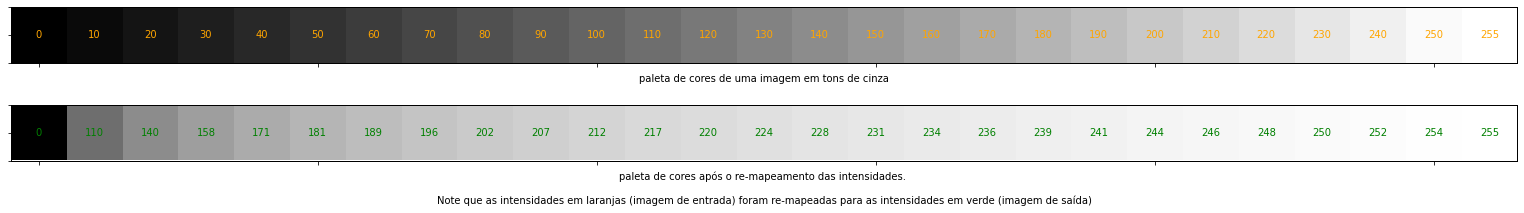

In [ ]:
def funcaoLogaritmo():
  EH = np.zeros(256)

  #inicio
  for i in range(0, 256):
    valor = 105.866 * math.log10( i + 1 )
    
    #verificar se o resultado está dentro do intervalo de [0 a 255]
    if(valor < 0): 
      EH[i] = 0
    elif(valor > 255):
      EH[i] = 255
    else:
      EH[i] = round(valor)


  #fim
  return EH

def filtroLogaritmo(imgEntrada):
  quantLinhas = np.size(imgEntrada, 0)
  quantColunas = np.size(imgEntrada, 1)

  imgSaida = np.zeros( (quantLinhas, quantColunas), dtype='uint8' )
  
  EH = funcaoLogaritmo()

  for linha in range(quantLinhas):
    for coluna in range(quantColunas):
      valor = imgEntrada[linha, coluna]
      
      imgSaida[linha, coluna] = EH[valor]

  return imgSaida


#############Testando a função#############
plotMapeamento( funcaoLogaritmo() )
plotPaleta( funcaoLogaritmo() )

4.3 Função exponencial

Sem parametros - Deixa a imagem mais escura

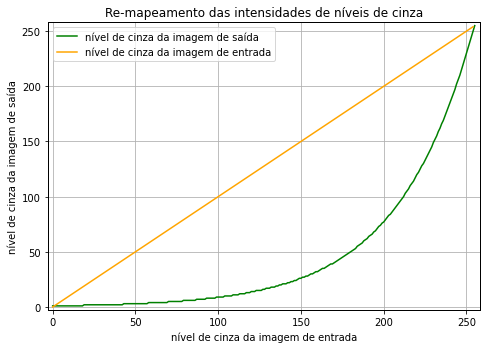

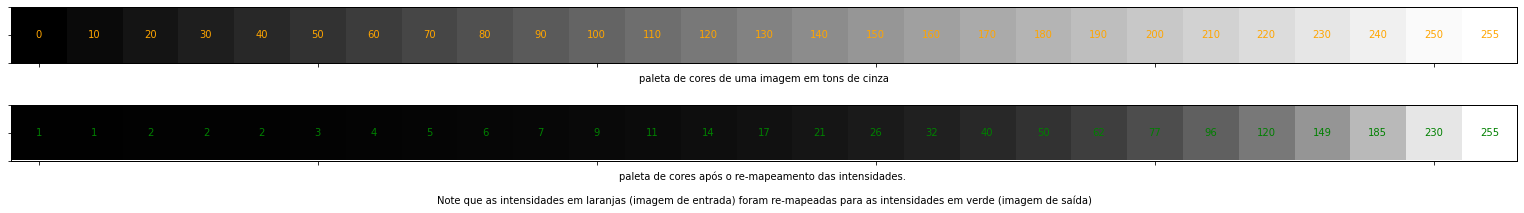

In [ ]:
def funcaoExponencial():
  EH = np.zeros(256)

  #inicio
  for i in range(0, 256):
    valor =  math.exp( i / 45.986 )

    #verificar se o resultado está dentro do intervalo de [0 a 255]
    if(valor < 0): 
      EH[i] = 0
    elif(valor > 255):
      EH[i] = 255
    else:
      EH[i] = round(valor)

  #fim
  return EH

def filtroExponencial(imgEntrada):
  quantLinhas = np.size(imgEntrada, 0)
  quantColunas = np.size(imgEntrada, 1)

  imgSaida = np.zeros( (quantLinhas, quantColunas), dtype='uint8' )
  
  EH = funcaoExponencial()
  
  for linha in range(quantLinhas):
    for coluna in range(quantColunas):
      valor = imgEntrada[linha, coluna]
      imgSaida[linha, coluna] = EH[valor]

  return imgSaida


#############Testando a função#############
plotMapeamento( funcaoExponencial() )
plotPaleta( funcaoExponencial() )

**"4.4. Função raiz quadrada"**

Sem parametros - Deixa a imagem mais clara.


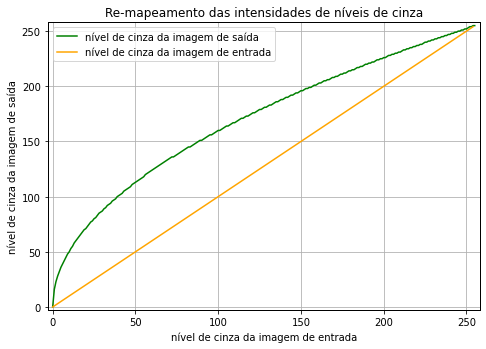

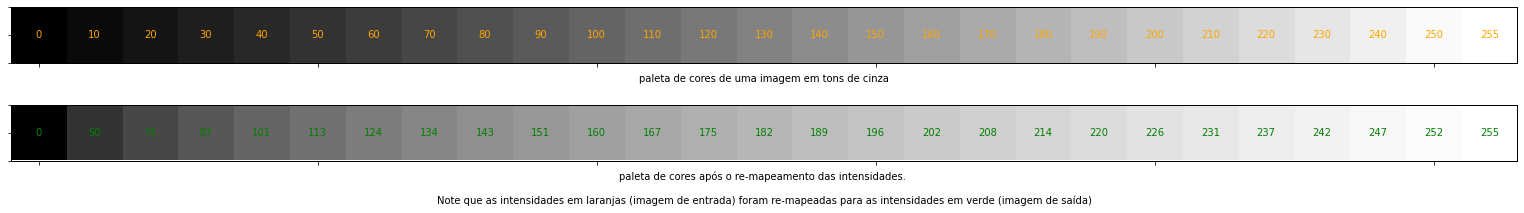

In [ ]:
def funcaoRaizQuadrada():
  EH = np.zeros(256)

  #inicio
  for i in range(0, 256):
    valor = 15.969 * math.sqrt(i)
    EH[i] = valor

    #verificar se o resultado está dentro do intervalo de [0 a 255]
    if(valor < 0): 
      EH[i] = 0
    elif(valor > 255):
      EH[i] = 255
    else:
      EH[i] = round(valor)


  #fim
  return EH

def filtroRaizQuadrada(imgEntrada):
  quantLinhas = np.size(imgEntrada, 0)
  quantColunas = np.size(imgEntrada, 1)
  imgSaida = np.zeros( (quantLinhas, quantColunas), dtype='uint8' )
  EH = funcaoRaizQuadrada()
  for linha in range(quantLinhas):
    for coluna in range(quantColunas):
      valor = imgEntrada[linha, coluna]
      imgSaida[linha, coluna] = EH[valor]

  return imgSaida


#############Testando a função#############
plotMapeamento( funcaoRaizQuadrada() )
plotPaleta( funcaoRaizQuadrada() )

**"4.5 Função Potência"**

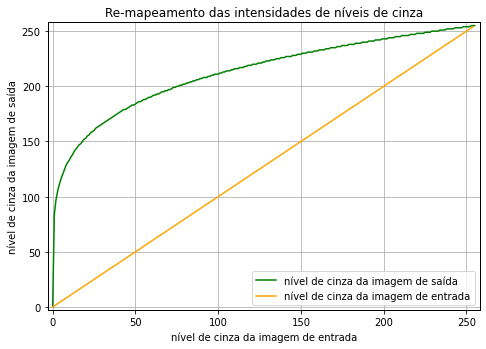

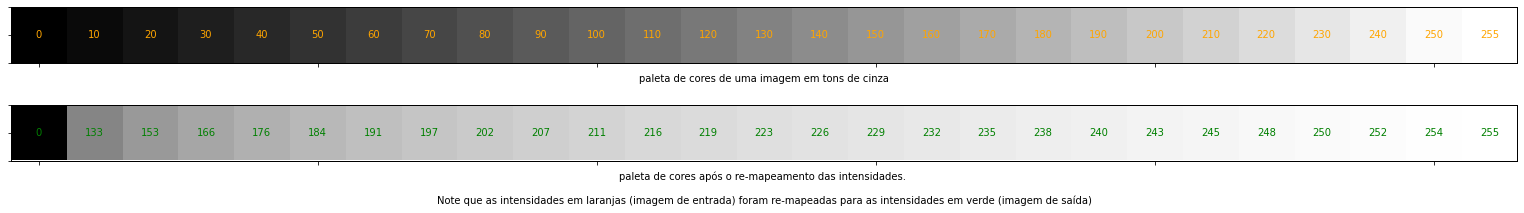

In [ ]:
def funcaoPotencia(gamma=2):
  EH = np.zeros(256)

  #inicio
  for i in range(0, 256):
    valor = math.pow(255, 1 - gamma) * math.pow(i, gamma)

    #verificar se o resultado está dentro do intervalo de [0 a 255]
    if(valor < 0): 
      EH[i] = 0
    elif(valor > 255):
      EH[i] = 255
    else:
      EH[i] = round(valor)

  #fim
  return EH

def filtroPotencia(imgEntrada, gamma=2):
  quantLinhas = np.size(imgEntrada, 0)
  quantColunas = np.size(imgEntrada, 1)
  imgSaida = np.zeros( (quantLinhas, quantColunas), dtype='uint8' )
  EH = funcaoPotencia(gamma)
  for linha in range(quantLinhas):
    for coluna in range(quantColunas):
      valor = imgEntrada[linha, coluna]
      imgSaida[linha, coluna] = EH[valor]

  return imgSaida


#############Testando a função#############
gamma = 0.2
plotMapeamento( funcaoPotencia(gamma) )
plotPaleta( funcaoPotencia(gamma) )

*** --- APLICAÇÃO  ---***

***borboleta.jpg***

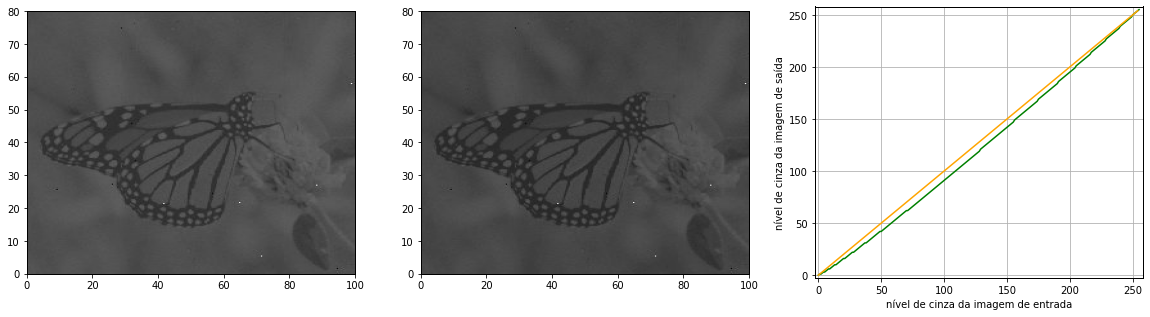

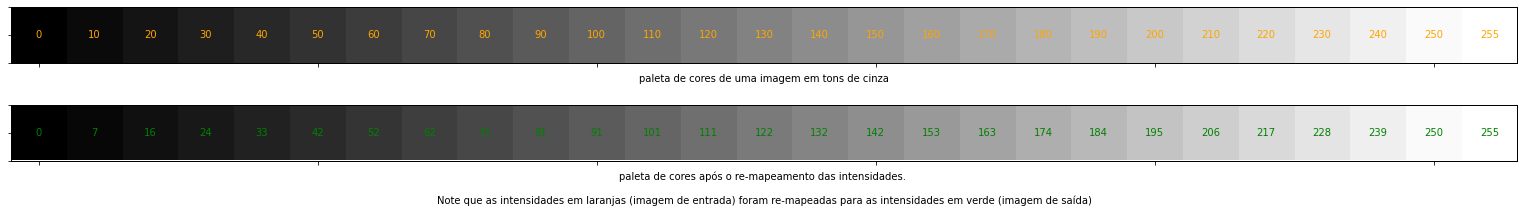

In [ ]:
imgEntrada = cv.imread(PATH + "/borboleta.jpg", cv.IMREAD_GRAYSCALE)

EH_potencia = funcaoPotencia(gamma=1.1)
plotarImagens(imgEntrada, EH_potencia)

***bridge.png***

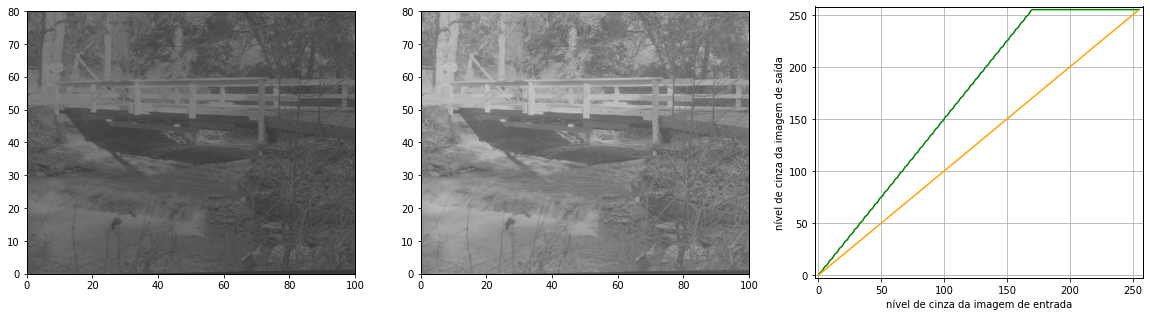

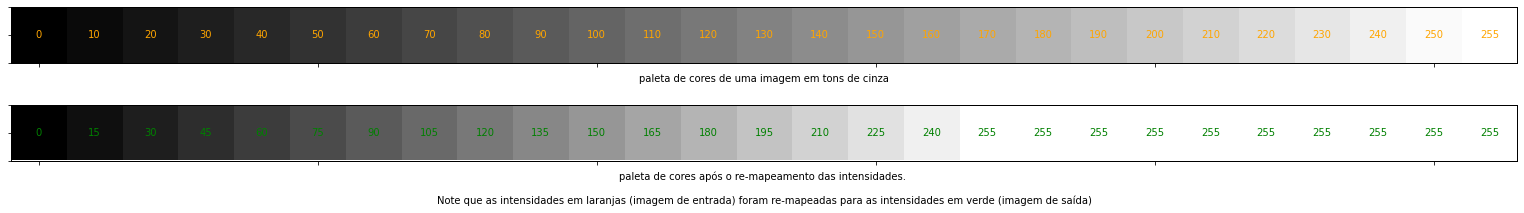

In [ ]:
imgEntrada = cv.imread(PATH + "/bridge.png", cv.IMREAD_GRAYSCALE)

EH_linear = funcaoLinear(1.5)
plotarImagens(imgEntrada, EH_linear)

**montanhas.png**

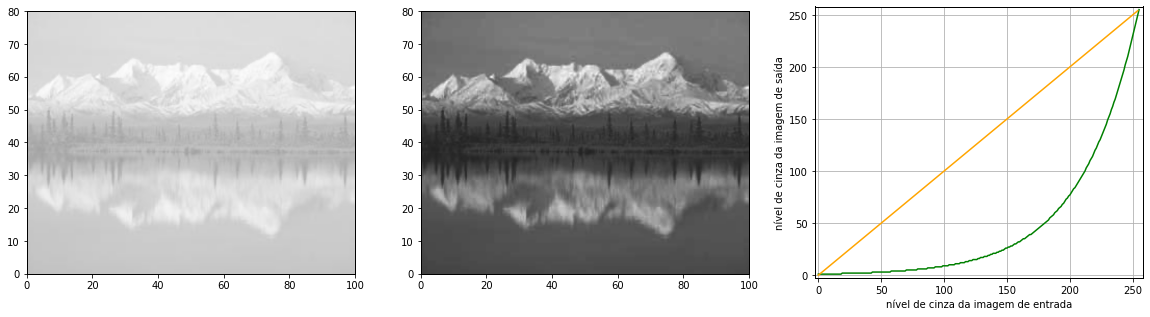

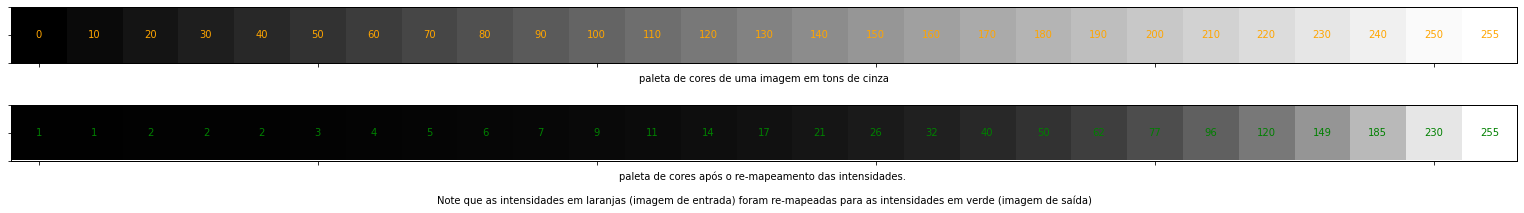

In [ ]:
imgEntrada = cv.imread(PATH + "/montanhas.png", cv.IMREAD_GRAYSCALE)

EH_exponencial = funcaoExponencial()
plotarImagens(imgEntrada, EH_exponencial)

**polen.jpg**

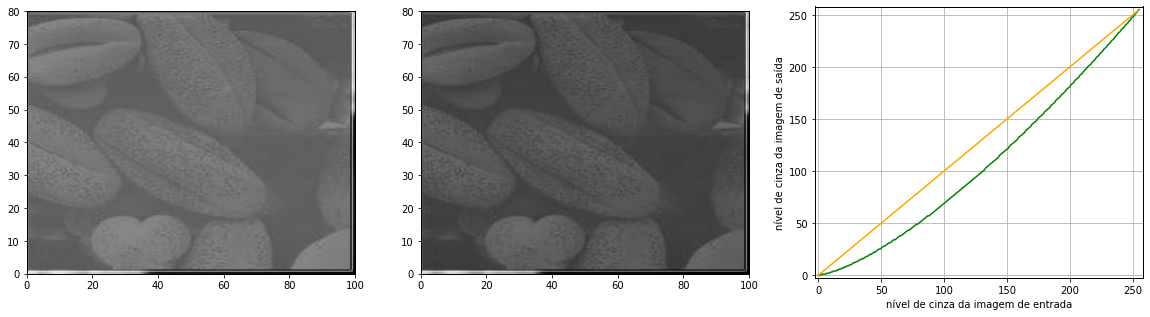

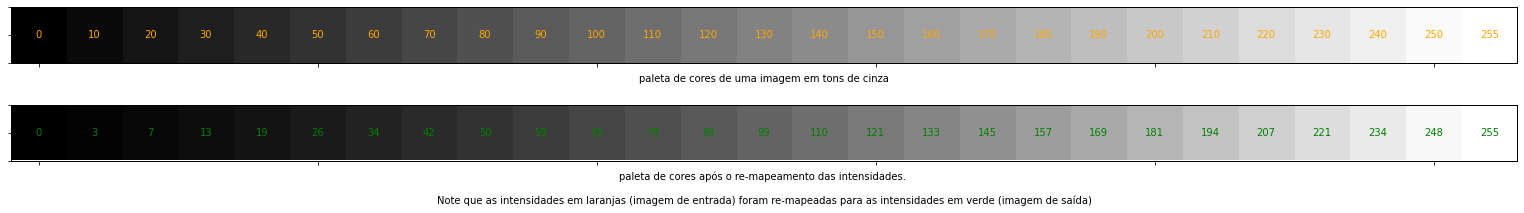

In [ ]:
imgEntrada = cv.imread(PATH + "/polen.jpg", cv.IMREAD_GRAYSCALE)

EH_potencia = funcaoPotencia(1.4)
plotarImagens(imgEntrada, EH_potencia)

**praia.png**

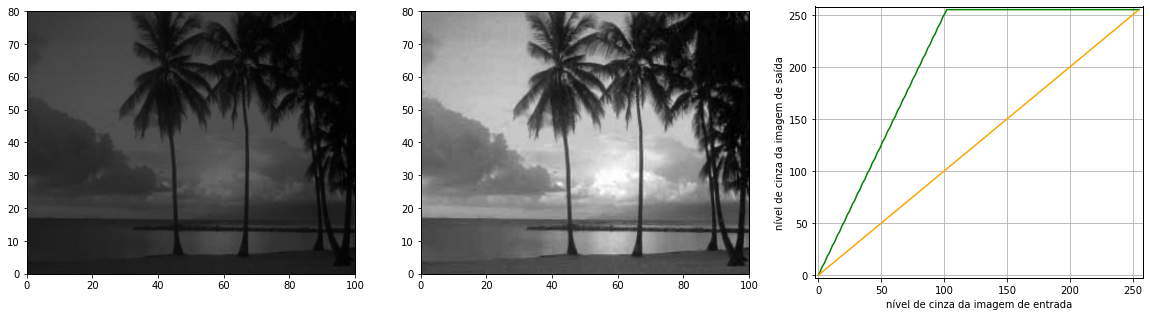

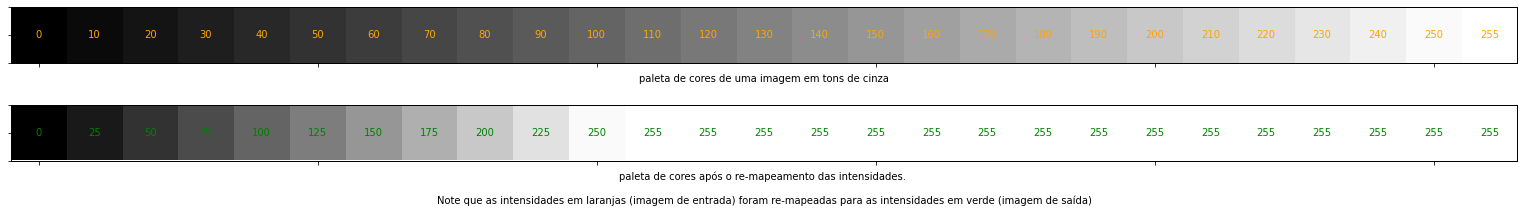

In [ ]:
imgEntrada = cv.imread(PATH + "/praia.png", cv.IMREAD_GRAYSCALE)

EH_linear = funcaoLinear(2.5)
plotarImagens(imgEntrada, EH_linear)

***Tacas.png***

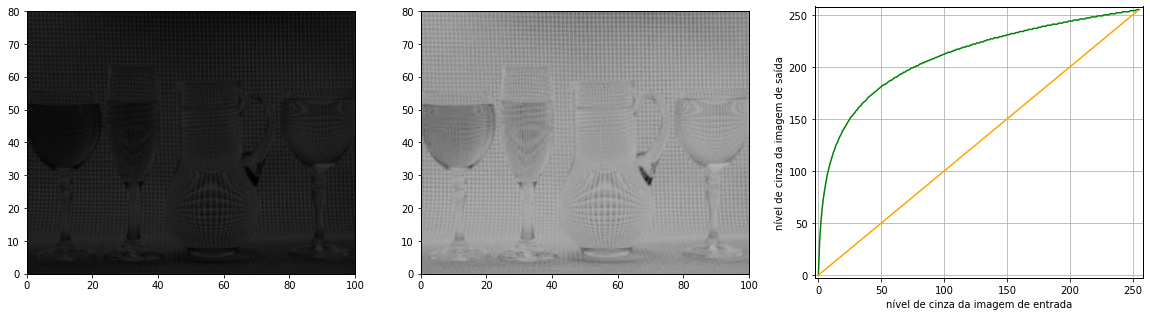

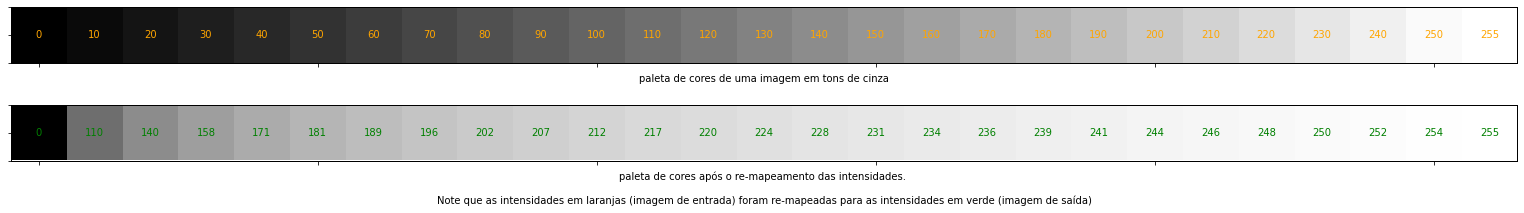

In [ ]:
imgEntrada = cv.imread(PATH + "/tacas.png", cv.IMREAD_GRAYSCALE)

EH_log = funcaoLogaritmo()
plotarImagens(imgEntrada, EH_log)

**satelite.jpg**

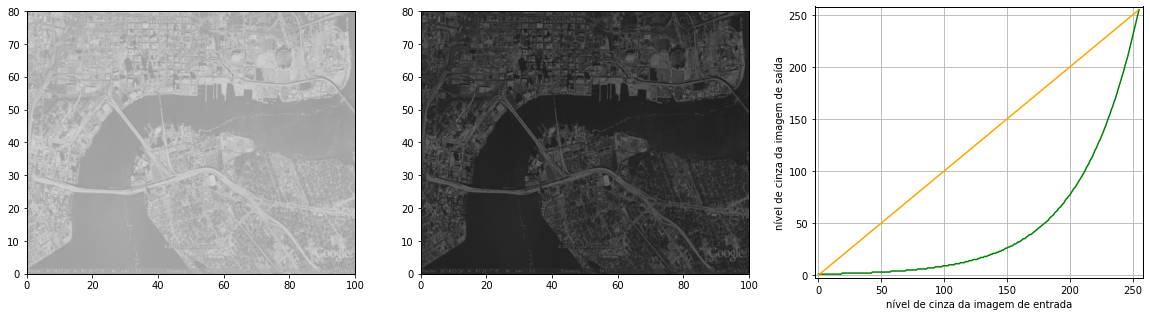

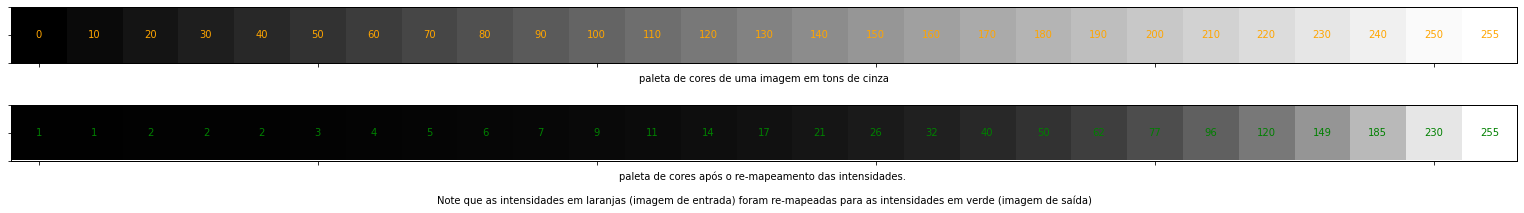

In [ ]:
imgEntrada = cv.imread(PATH + "/satelite.jpg", cv.IMREAD_GRAYSCALE)

EH_exponencial = funcaoExponencial()
plotarImagens(imgEntrada, EH_exponencial)

**teste.png**

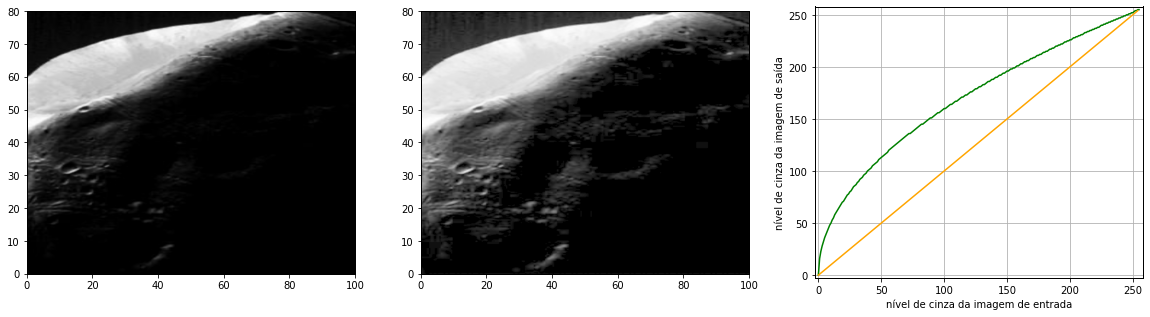

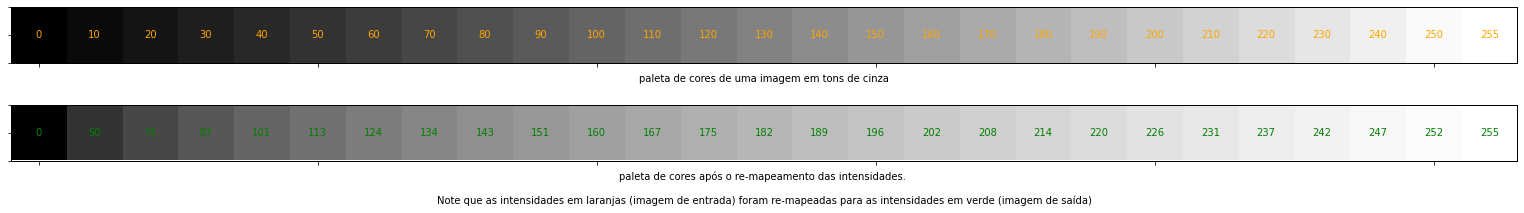

In [ ]:
imgEntrada = cv.imread(PATH + "/teste.png", cv.IMREAD_GRAYSCALE)

EH_raizq = funcaoRaizQuadrada()
plotarImagens(imgEntrada, EH_raizq)

**ursos.jpg**

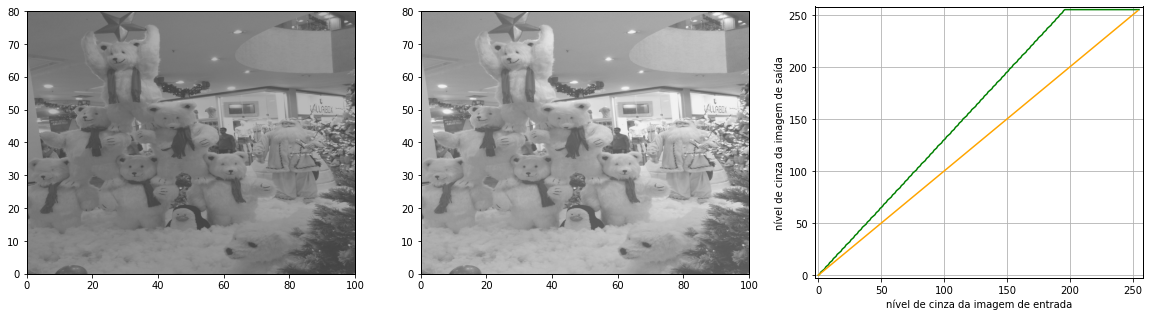

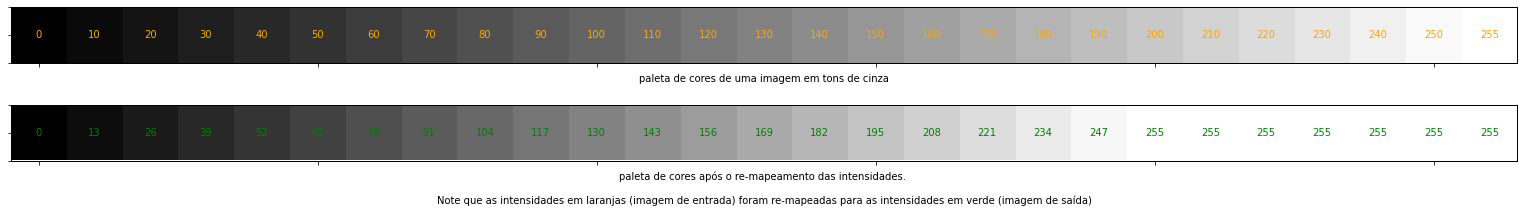

In [ ]:
imgEntrada = cv.imread(PATH + "/ursos.jpg", cv.IMREAD_GRAYSCALE)

EH_linear = funcaoLinear(1.3)
plotarImagens(imgEntrada, EH_linear)